# Imports and Load Data

In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import string
import random
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import gensim

ndf = pd.read_csv('philosophy_data.csv')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jacob\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


# Exploratory Data Analysis

In [3]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [91]:
ndf.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


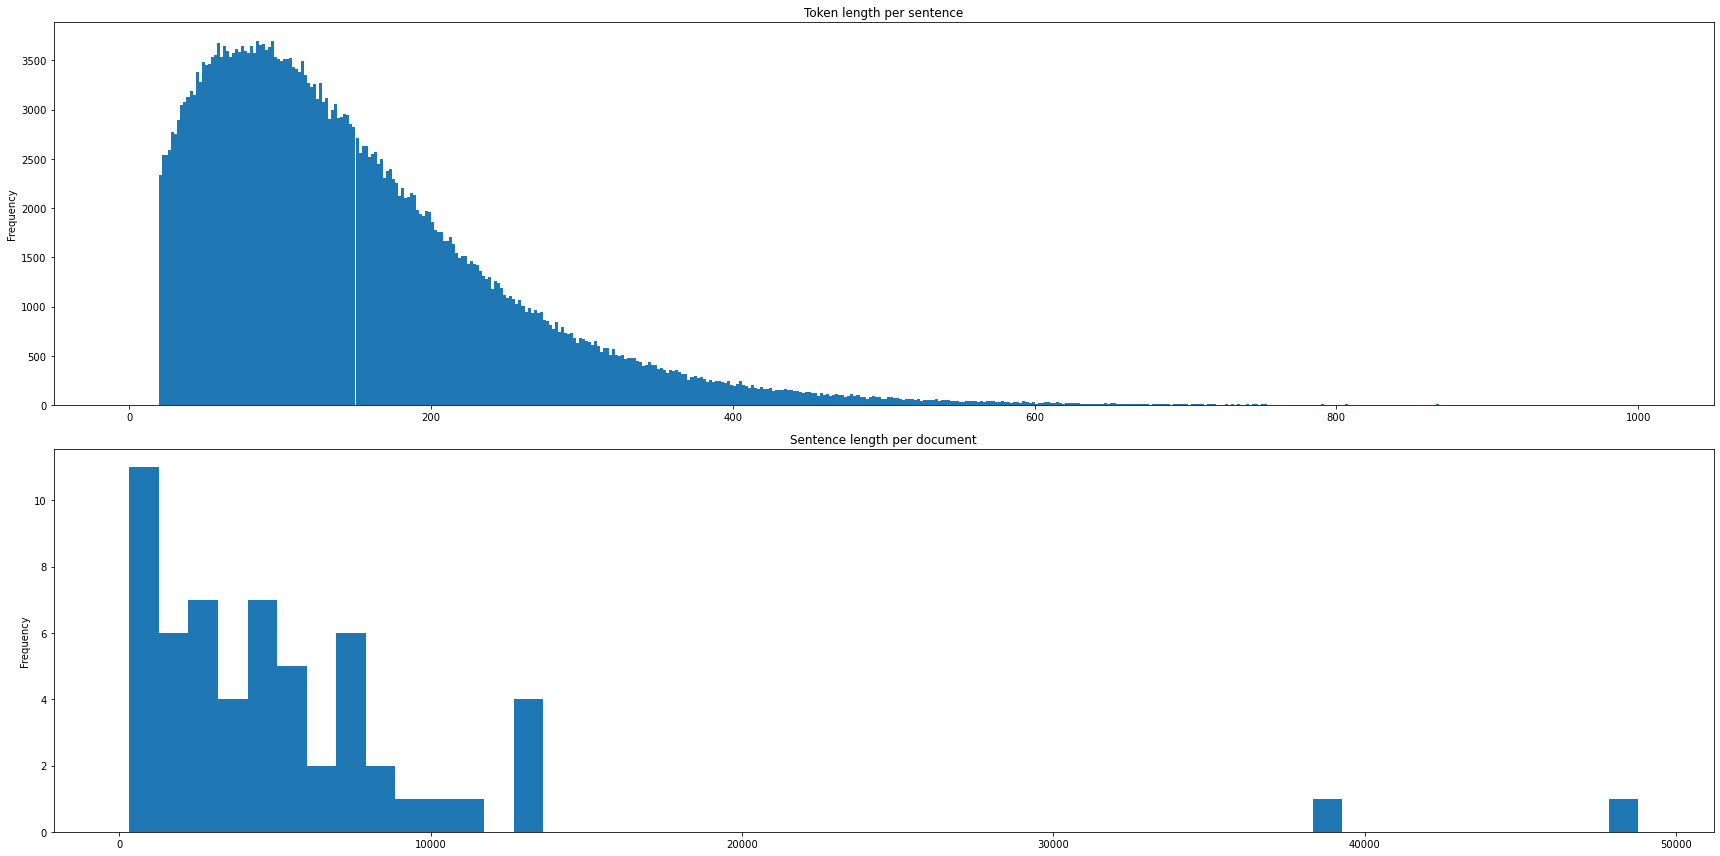

In [102]:
#to gather length of document per sentences
titles = ndf['title'].unique()

#set up superplot
fig, axes = plt.subplots(2,1, figsize=(24,12))

#first plot is the sentence distribution per word
axes[0].set_title('Token length per sentence')
ndf.sentence_length.plot(kind='hist',bins=500,range=(0,1000), ax = axes[0])
plt.plot()

#second plot is the document distribution per sentence
axes[1].set_title('Sentence length per document')
ndf.groupby(['title']).sentence_length.size().plot(kind='hist', bins=51,ax = axes[1])
plt.plot()

fig.tight_layout()
plt.show()




In [100]:
# uncomment to see the document length, per sentence, of each title
pd.DataFrame(ndf.groupby(['title','author']).sentence_length.size().sort_values(ascending=True))

,,sentence_length
title,author,
Enchiridion,Epictetus,323
Discourse On Method,Descartes,340
On The Improvement Of Understanding,Spinoza,489
The Communist Manifesto,Marx,493
Meditations On First Philosophy,Descartes,792
The Idea Of Phenomenology,Husserl,910
A Treatise Concerning The Principles Of Human Knowledge,Berkeley,1040
Second Treatise On Government,Locke,1143
The Antichrist,Nietzsche,1170


In [507]:
#replace EOS punctuation with whitespace
words = ndf.sentence_lowered.str.replace(r'[.?!\\-]', ' ')

#remove punctuation thats not at EOS
words = words.str.replace(r'[^\w\s]+', '')

non_tokenized_words = words

words = [tokenize.word_tokenize(sentence) for sentence in words]


vocab_list = [y for x in words for y in x]


# Pos Tagging for Lemmatization 

In [525]:
post_tagged = []
for sentence in non_tokenized_words:
    post_tagged.append(pos_tag(tokenize.word_tokenize(sentence)))

post_tagged

[[('whats', 'NNS'),
  ('new', 'JJ'),
  ('socrates', 'NNS'),
  ('to', 'TO'),
  ('make', 'VB'),
  ('you', 'PRP'),
  ('leave', 'VB'),
  ('your', 'PRP$'),
  ('usual', 'JJ'),
  ('haunts', 'NNS'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('lyceum', 'NN'),
  ('and', 'CC'),
  ('spend', 'VB'),
  ('your', 'PRP$'),
  ('time', 'NN'),
  ('here', 'RB'),
  ('by', 'IN'),
  ('the', 'DT'),
  ('king', 'NN'),
  ('archons', 'NNS'),
  ('court', 'NN')],
 [('surely', 'RB'),
  ('you', 'PRP'),
  ('are', 'VBP'),
  ('not', 'RB'),
  ('prosecuting', 'VBG'),
  ('anyone', 'NN'),
  ('before', 'IN'),
  ('the', 'DT'),
  ('king', 'NN'),
  ('archon', 'NN'),
  ('as', 'IN'),
  ('i', 'NN'),
  ('am', 'VBP')],
 [('the', 'DT'),
  ('athenians', 'NNS'),
  ('do', 'VBP'),
  ('not', 'RB'),
  ('call', 'VB'),
  ('this', 'DT'),
  ('a', 'DT'),
  ('prosecution', 'NN'),
  ('but', 'CC'),
  ('an', 'DT'),
  ('indictment', 'NN'),
  ('euthyphro', 'NN')],
 [('what', 'WP'),
  ('is', 'VBZ'),
  ('this', 'DT'),
  ('you', 'PRP'),
  ('say', 'VBP')],
 [('so

In [458]:
word_freq = pd.DataFrame(nltk.FreqDist(vocab_list).most_common(1000), columns = ['word', 'frequency'])
word_freq


,word,frequency
0,the,660399
1,of,422581
2,and,271489
3,to,260456
4,is,235111
...,...,...
995,faith,922
996,connected,920
997,ancient,917
998,movements,917


<AxesSubplot:>

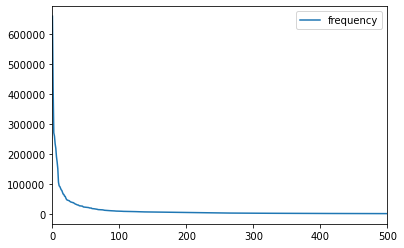

In [341]:
word_freq.plot(xlim=(0,500))

# vocab amount

In [466]:
class VocabWord:
    def __init__(self, word):
        self.word = word
        self.count = 0

vocab_items = []
vocab_hash = {}
word_count = 0

for token in ['<bol>', '<eol>']:
    vocab_hash[token] = len(vocab_items)
    vocab_items.append(VocabWord(token))
    
for line in tokenized_words:
    tokens = line.split()
    for token in tokens:
        if token not in vocab_hash:
            vocab_hash[token] = len(vocab_items)
            vocab_items.append(VocabWord(token))
            
        vocab_items[vocab_hash[token]].count +=1
        word_count += 1
        
        if word_count %1000000 == 0:
            print("\rReading word %d" % word_count)
            
    
    vocab_items[vocab_hash['<bol>']].count += 1
    vocab_items[vocab_hash['<eol>']].count += 1
    word_count += 2
    
print('Total words in training file: %d' % word_count)
print('Vocab Size: %d' % len(vocab_items))

Reading word 1000000
Reading word 2000000
Reading word 3000000
Reading word 4000000
Reading word 5000000
Reading word 6000000
Reading word 7000000
Reading word 9000000
Reading word 10000000
Total words in training file: 10239485
Vocab Size: 93047


# data augmentation

In [346]:
greek_dict = pd.read_csv('dodson.csv', sep='\t')

In [352]:
greek_dict.tail()


,Strong's,Goodrick-Kohlenberger,Greek Word,English Definition (brief),English Definition (longer)
5403,5620,6063,w(/ste,"so that, therefore","so that, therefore, so then, so as to."
5404,5621,"6064,6065","w)ti/on, ou, to/",an ear,an ear.
5405,5622,6066,"w)fe/leia, as, h(","usefulness, profit, advantage","usefulness, profit, advantage, benefit, gain."
5406,5623,6067,w)fele/w,"I help, benefit, do good","I help, benefit, do good, am useful (to), profit."
5407,5624,6068,"w)fe/limos, on","profitable, beneficial, useful","profitable, beneficial, useful."


In [354]:
greek_dict.columns.values

array(["Strong's", 'Goodrick-Kohlenberger', 'Greek Word',
       'English Definition (brief)', 'English Definition (longer)'],
      dtype=object)

In [463]:
# def synonym_replacement(sentence):
#     print(random.choice(sentence))

    
# filtered_rows = greek_dict[greek_dict['English Definition (brief)'].str.contains("good")]
# filtered_rows['English Definition (brief)'].str.split(',')

# filtered_rows[0]

# for sentence in ndf.sentence_lowered:
# for sentence in tokenized_words:
#     synonym_replacement(sentence)


In [528]:
documents = [gensim.utils.simple_preprocess(non_tokenized_words.iloc[i]) for i in range(len(tokenized_words))]



In [ ]:
model = gensim.models.Word2Vec(documents,
                                size=100,
                                window=10,
                                min_count=2,
                                workers=4)
model.train(documents, total_examples=len(documents), epochs=10)



In [494]:
model.wv.most_similar("prosecute", topn=5)

[('kill', 0.6762655973434448),
 ('punish', 0.6493467092514038),
 ('disobey', 0.6305896043777466),
 ('commend', 0.6263549327850342),
 ('chastise', 0.6141887903213501)]